In [9]:
import matplotlib.pyplot as plt

In [10]:
import numpy as np

In [11]:
import pandas as pd

**Load FIFA Data**

In [6]:
import pandas as pd
gas=pd.read_csv('/content/gas_prices.csv')
fifa=pd.read_csv('/content/fifa_data.csv')

In [8]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94.0,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94.0,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93.0,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93.0,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92.0,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [30]:
fifa['Preferred Foot']

0        Left
1       Right
2       Right
3       Right
4       Right
        ...  
6231     Left
6232    Right
6233    Right
6234     Left
6235      NaN
Name: Preferred Foot, Length: 6236, dtype: object

**Histogram**


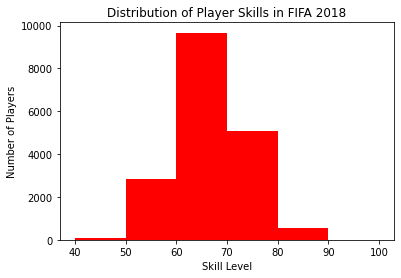

In [12]:
bins=[40,50,60,70,80,90,100]
plt.hist(fifa.Overall,bins=bins, color='red')
plt.xticks(bins)
plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title("Distribution of Player Skills in FIFA 2018")

plt.show()

In [ ]:
for col in fifa:
  print(col)

**pie** **CHart**

bold text

In [13]:
left=fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right=fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

In [14]:
left

4211

In [15]:
right

13948

In [17]:
labels=['left','right']

Text(0.5, 1.0, 'Foot preferred of Fifa Players')

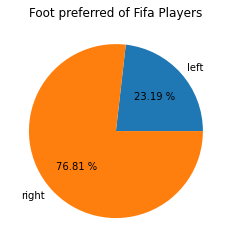

In [18]:
plt.pie([left, right], labels=labels,autopct='%.2f %%')
plt.title("Foot preferred of Fifa Players")

In [19]:
fifa['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [20]:
fifa.weight=[ x.strip('lbs') if type(x)==str else x for x in fifa.Weight]

<ipython-input-20-bf852f92ba70>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  fifa.weight=[ x.strip('lbs') if type(x)==str else x for x in fifa.Weight]


In [21]:
fifa.Weight=[int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

In [56]:
fifa.Weight

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [59]:
fifa.Weight[41]

203.0

In [83]:
light=fifa.loc[fifa.Weight < 125].count()[0]
light_medium=fifa.loc[(fifa.Weight >=125) & (fifa.Weight < 150)].count()[0]

In [77]:
light

41

In [78]:
light_medium=fifa.loc[(fifa.Weight>=125) & (fifa.Weight<150)]

In [ ]:
light_medium

In [80]:
medium=fifa.loc[(fifa.Weight >=150) & (fifa.Weight < 175)].count()[0]
medium_heavy=fifa[(fifa.Weight>=175) & fifa.Weight<200].count()[0]
heavy=fifa[(fifa.Weight>=200)].count()[0]

In [54]:
medium

4583

In [99]:
weights=[light, light_medium,medium,medium_heavy,heavy]

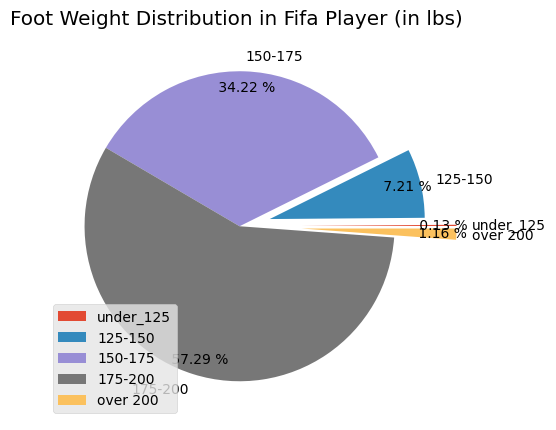

In [172]:
labels=['under_125','125-150','150-175','175-200','over 200']
plt.style.use('ggplot')
explode=(.4,0.2,0,0,0.4)
plt.figure(1,figsize=(5,8))
plt.pie(weights,labels=labels,autopct='% .2f %%',pctdistance=0.9, explode=explode)
plt.title('Foot Weight Distribution in Fifa Player (in lbs) ')
plt.savefig('Fifa_Foot_Weight_Pie.png')
plt.legend()
plt.show()

**Box** **Plot**

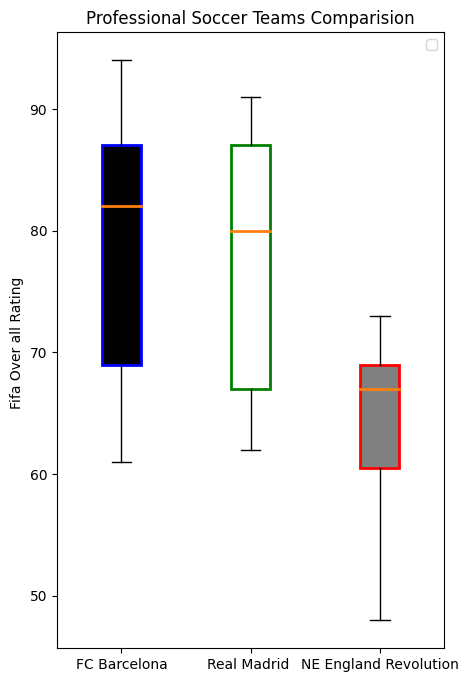

In [176]:
plt.style.use('default')
plt.figure(figsize=(5,8))
barcelona=fifa.loc[fifa.Club=='FC Barcelona']['Overall']
madrid=fifa.loc[fifa.Club=='Real Madrid']['Overall']
rev=fifa.loc[fifa.Club== 'New England Revolution']['Overall']
labels=['FC Barcelona', 'Real Madrid ', 'NE England Revolution']
boxes=plt.boxplot([barcelona,madrid,rev], labels=labels, patch_artist=True, medianprops={'linewidth':2})
colors=['blue','green','red']
facecolors=['black','white','grey']
for box in boxes['boxes']:
  box.set(color=colors.pop(0), linewidth=2)
  box.set(facecolor=facecolors.pop(0))
plt.title("Professional Soccer Teams Comparision")
plt.ylabel('Fifa Over all Rating ')

plt.legend()
plt.savefig('Fifa_Boxplot_Player_Overall.png', dpi=300)
plt.show()



